<a href="https://colab.research.google.com/github/Kaiziferr/Deep_Learning_Workshop/blob/master/RNN/04_workshop_LSTM_batch_memory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM con memoria entre batchs
La red LSTM tiene memoria que es capaz de recordar secuencias largas

Normalmente, el estado dentro de la red se restablece después de cada batch, asi como con cada llamada a **model.predict()** o **model.evaluate()**. Podemos obtener un control más preciso sobre cuando se borra el estado interno de la red LSTM haciendo que la capa LSTM tenga estado (párametro **stateful**)

Por lo tanto, es necesario que los datos de entrenamiento no se mezclen al ajustar la red y un restablecimiento explicito del estado de la red después de la epoca mediante llamadas a la funcion **model.reset states()**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
def create_dataset(data, loock_back = 1):
  dataX, dataY = [], []
  for i in range(len(data) - loock_back-1):
    a = data[i: (i+loock_back), 0]
    dataX.append(a)
    dataY.append(data[i+loock_back, 0])
  return np.array(dataX), np.array(dataY)


In [3]:
data = pd.read_csv('./data/international-airline-passengers.csv', usecols=[1], engine='python')
data_values = data.values.astype('float32')

In [4]:
#Normalization de datos
scaler = MinMaxScaler(feature_range=(0,1))
data_values = scaler.fit_transform(data_values)

In [5]:
#train and test
train_size = int(len(data_values)*0.67)
test_set = len(data_values) - train_size
train, test = data_values[0:train_size, :], data_values[train_size:, :]
display(len(data_values), len(train), len(test) )

144

96

48

In [6]:
loock_back = 3
trainX, trainY = create_dataset(train, loock_back)
testX, testY = create_dataset(test, loock_back)

In [7]:
# La red LSTM espera que los datos de entrada (X) se proporcionen con una estructura de matriz especifica en forma de [muestras, pasos de tiempo (ventana), caracteristicas]

#Los datos preparados tienen la forma: [muestras, carcteristicas]

#Muestra y caracteristicas
trainX.shape

(92, 3)

In [8]:
# cambia la ventana y la caracteristica
trainX = np.reshape(trainX, (trainX.shape[0],trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0],testX.shape[1],1))

In [9]:
batch_size = 1 
model = Sequential()
#Entre un batch y otro, habra una memoria
batch_size = 1
model.add(LSTM(4, batch_input_shape = (batch_size, loock_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
#Los estados deben reseteando, por cada epoca
for i in range(100):
  model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose = 2, shuffle=False)
  model.reset_states()



92/92 - 17s - loss: 0.0296
92/92 - 0s - loss: 0.0302
92/92 - 0s - loss: 0.0245
92/92 - 0s - loss: 0.0214
92/92 - 0s - loss: 0.0189
92/92 - 0s - loss: 0.0168
92/92 - 0s - loss: 0.0146
92/92 - 0s - loss: 0.0122
92/92 - 0s - loss: 0.0097
92/92 - 0s - loss: 0.0073
92/92 - 0s - loss: 0.0057
92/92 - 0s - loss: 0.0050
92/92 - 0s - loss: 0.0048
92/92 - 0s - loss: 0.0047
92/92 - 0s - loss: 0.0047
92/92 - 0s - loss: 0.0046
92/92 - 0s - loss: 0.0046
92/92 - 0s - loss: 0.0045
92/92 - 0s - loss: 0.0045
92/92 - 0s - loss: 0.0044
92/92 - 0s - loss: 0.0044
92/92 - 0s - loss: 0.0043
92/92 - 0s - loss: 0.0043
92/92 - 0s - loss: 0.0042
92/92 - 0s - loss: 0.0042
92/92 - 0s - loss: 0.0041
92/92 - 0s - loss: 0.0041
92/92 - 0s - loss: 0.0041
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0037
92/92 - 0s 

# Diseño de LSTM
Finalmente, cuando se construye la capa LSTM, el parámetro **stateful** debe establecerse en True y, en lugar de especificar, mediante el parámetro **batch_input_shape:**

1. Las dimensiones de entrada
2. Codificar el número de muestras en un batch
3. El número de pasos de tiempo en una muestra **y**
4. El número de caracteristicas en un paso de tiempo


In [10]:
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
model.reset_states()

In [11]:
#Invert prediction
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])

testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [12]:
# Calcular el error
train_score = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Puntuación Entrenamiento: %.2f RMSE' % (train_score))

test_score = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Puntuación Test: %.2f RMSE' % (test_score))

Puntuación Entrenamiento: 22.83 RMSE
Puntuación Test: 108.48 RMSE


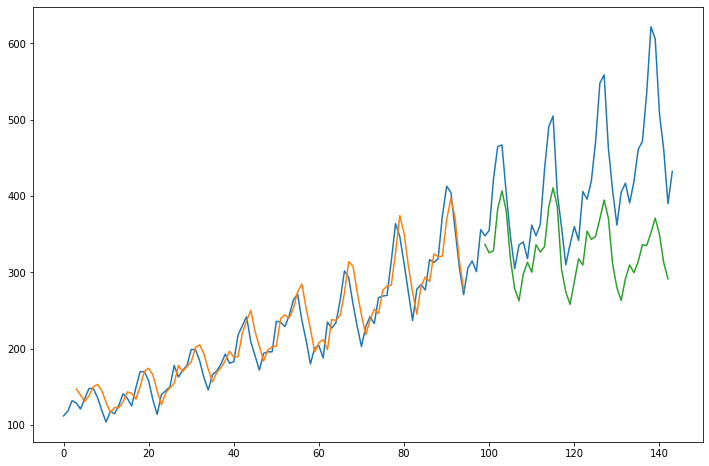

In [13]:
trainPredictPlot = np.empty_like(data_values)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[loock_back: len(trainPredict)+loock_back, :] = trainPredict

testPredictPlot = np.empty_like(data_values)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(trainPredict)+(loock_back*2)+1:len(data_values)-1,:] = testPredict

plt.figure(figsize=(12,8))
plt.plot(scaler.inverse_transform(data_values))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)